## Using K-means for perform image compression

In [53]:
%matplotlib inline
from IPython import display
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
sn.set(style='whitegrid')

(-0.5, 319.5, 213.5, -0.5)

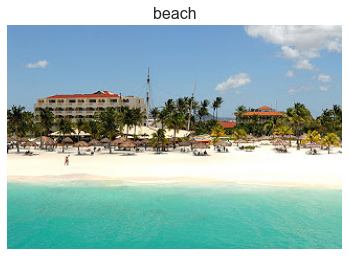

In [54]:
from skimage import io, img_as_float
I = io.imread('beach.bmp')
I = img_as_float(I)
fig, ax = plt.subplots(figsize=(6, 6))
ax.imshow(I)
ax.set_title('beach', fontsize=16)
ax.axis('off')

Above image I is 3D NP array <br>
I[i,j,k]: i is row index, j is column index, and k is channel (color) index <br>
I[0,0] is the pixel at row-0 and col-0, and it has three values r,g,b

In [55]:
I.shape

(214, 320, 3)

In [56]:
I[0,319]

array([0.85490196, 0.87058824, 0.88235294])

### Prepare data into a matrix

In [57]:
#your code

X_list=[]
for i in range(0,214):
    for j in range(0,320):
        row=np.float32(I[i][j])
        X_list.append(row)
        
        
X=np.array(X_list)
print('shape of X:',X.shape,'-> 320 * 214 = 68480')
X

shape of X: (68480, 3) -> 320 * 214 = 68480


array([[0.43137255, 0.6039216 , 0.7882353 ],
       [0.43137255, 0.6039216 , 0.7882353 ],
       [0.43137255, 0.6039216 , 0.7882353 ],
       ...,
       [0.3882353 , 0.7058824 , 0.67058825],
       [0.37254903, 0.7019608 , 0.6431373 ],
       [0.37254903, 0.7019608 , 0.6431373 ]], dtype=float32)

### K-Means

In [58]:
model_list=[]
from sklearn.cluster import KMeans

model=KMeans(n_clusters=5,random_state=0)
model=model.fit(X)
model

KMeans(n_clusters=5, random_state=0)

In [59]:
# Cluster centers
labels=model.fit_predict(X) 
centers = model.cluster_centers_
centers[labels].shape

(68480, 3)

### Compress image
1. Make a copy of the the data matrix X, call it Y
2. Then, modify the data matrix Y, such that every data point is replaced by the corresponding cluster center
3. Convert the data matrix Y back to an image Ic <br>

In [ ]:
Y=X
for i in range(1,len(labels)):
    Y[i]=centers[labels[i-1]]
Ic=Y.reshape((214, 320, 3))

In [61]:
Ic.shape

(214, 320, 3)

## Visualise compression

(-0.5, 319.5, 213.5, -0.5)

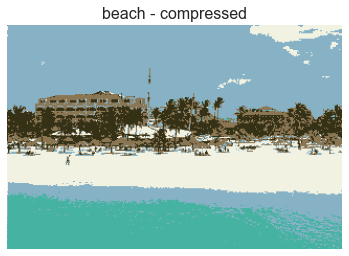

In [62]:
fig, ax = plt.subplots(figsize=(6, 6))
ax.imshow(Ic)
ax.set_title('beach - compressed', fontsize=16)
ax.axis('off')

### Step-5: save the compressed image to a bmp file

In [63]:
# normalize the pixel values in the range of 0 ~ 255
Is=255*(Ic- Ic.min())/(Ic.max()-Ic.min())
# chagne datay type to unit8
Is=Is.astype('uint8')
io.imsave('beach_compressed_k' + str(5) + '.bmp', Is)

# Test out different numbers of clusters

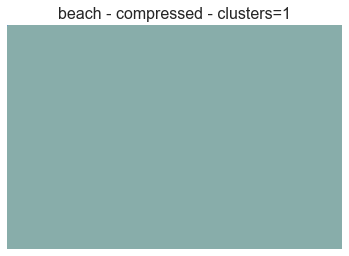

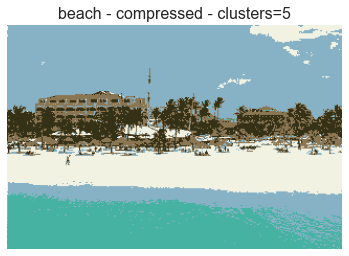

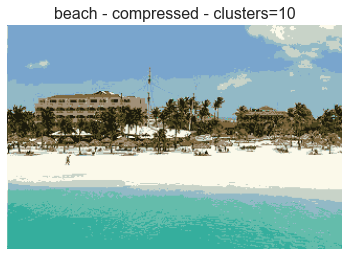

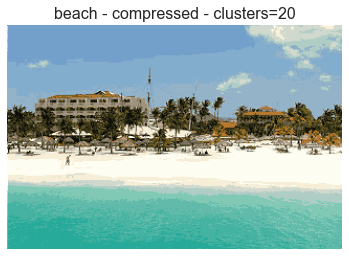

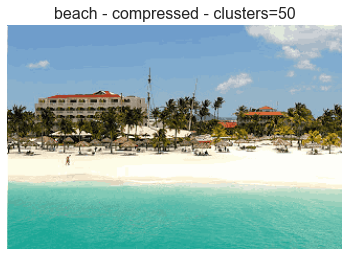

In [64]:
cluster_lst=[1,5,10,20,50]

for n in range(0,len(cluster_lst)):
    
    I = io.imread('beach.bmp')
    I = img_as_float(I)
    
    X_list=[]
    for i in range(0,214):
        for j in range(0,320):
            row=np.float32(I[i][j])
            X_list.append(row)
        
        
    X=np.array(X_list)

    #your code, k is the number of clusters
    model_list=[]

    model=KMeans(n_clusters=cluster_lst[n],random_state=0)
    model=model.fit(X)

    # centers stores the cluster centers
    labels=model.fit_predict(X) 
    centers = model.cluster_centers_
    centers[labels].shape
    centers[labels]

    Y=X
    for i in range(1,len(labels)):
        Y[i]=centers[labels[i-1]]
    Ic=Y.reshape((214, 320, 3))
  fig, ax = plt.subplots(figsize=(6, 6))
    ax.imshow(Ic)
    ax.set_title('beach - compressed - clusters='+str(cluster_lst[n]), fontsize=16)
    ax.axis('off')
    plt.show()
    
